# Word Search

In [4]:
from PIL import Image
derechos_humanos = Image.open('images/wordsearch.png')

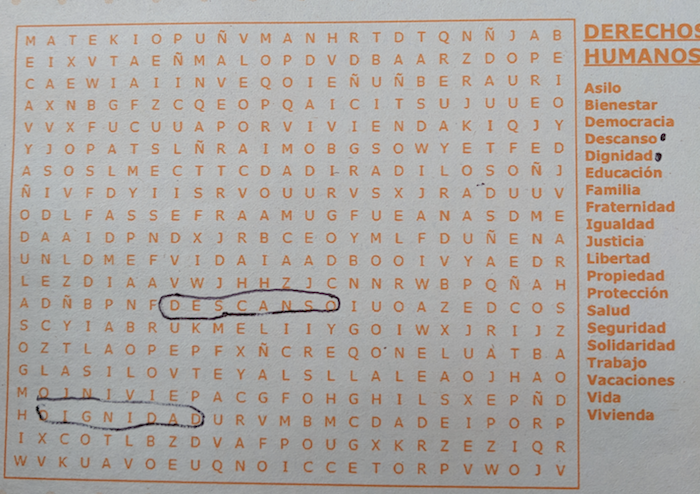

In [5]:
derechos_humanos

In [6]:
grid = ['matekiopuñvmanhrtdtqnñjab', 'eixvtaeñmalopdvdbaarzdope', 'caewiaiinveqoieñuñberauri',
        'axnbgfzcqeopqaicitsujuueo', 'vvxfucuuaporviviendakiqjy', 'yjopatslñraimobgsowyetfed',
        'asoslmecttcdadiradilosoñj', 'ñivfdyiisrvouurvsxjraduuv', 'odlfassefraamugfueanasdme',
        'daaidpndxjrbceoymlfduñena', 'unldmefvidaiaadbooivyaedr', 'lezdiaavwjhhzjcnnrwbpqñah',
        'adñbpnfdescansoiuoazedcos', 'scyiabrukmeliiygoiwxjrijz', 'oztlaopepfxñcreqoneluatba',
        'glasilovteyalsllaleaojhao', 'mojniviepacgfohghilsxepñd', 'hdignidadurvmbmcdadeiporp',
        'ixcotlbzdvafpougxkrzeziqr', 'wvkuavoeuqnoiccetorpvwojv']

grid = [list(row.upper()) for row in grid]

In [7]:
from IPython.core.display import display, HTML

def print_wordsearch(grid):
    output = '<table>'

    for row in grid:
        output += '<tr>'
        for c in row:
            output += '<td>' + c + '</td>'
        output += '</tr>'
        
    output += '</table>'
    
    display(HTML(output))

In [8]:
print_wordsearch(grid)

M,A,T,E,K,I,O,P,U,Ñ,V,M,A,N,H,R,T,D,T,Q,N,Ñ,J,A,B
E,I,X,V,T,A,E,Ñ,M,A,L,O,P,D,V,D,B,A,A,R,Z,D,O,P,E
C,A,E,W,I,A,I,I,N,V,E,Q,O,I,E,Ñ,U,Ñ,B,E,R,A,U,R,I
A,X,N,B,G,F,Z,C,Q,E,O,P,Q,A,I,C,I,T,S,U,J,U,U,E,O
V,V,X,F,U,C,U,U,A,P,O,R,V,I,V,I,E,N,D,A,K,I,Q,J,Y
Y,J,O,P,A,T,S,L,Ñ,R,A,I,M,O,B,G,S,O,W,Y,E,T,F,E,D
A,S,O,S,L,M,E,C,T,T,C,D,A,D,I,R,A,D,I,L,O,S,O,Ñ,J
Ñ,I,V,F,D,Y,I,I,S,R,V,O,U,U,R,V,S,X,J,R,A,D,U,U,V
O,D,L,F,A,S,S,E,F,R,A,A,M,U,G,F,U,E,A,N,A,S,D,M,E
D,A,A,I,D,P,N,D,X,J,R,B,C,E,O,Y,M,L,F,D,U,Ñ,E,N,A
U,N,L,D,M,E,F,V,I,D,A,I,A,A,D,B,O,O,I,V,Y,A,E,D,R


In [9]:
words = set(w.upper() for w in ['asilo', 'bienestar', 'democracia', 'descanso', 'dignidad', 'educacion',
         'familia', 'fraternidad', 'igualdad', 'justicia', 'libertad', 'propiedad',
         'proteccion', 'salud', 'trabajo', 'vacaciones', 'vida', 'vivienda'])

In [10]:
# Brute force
#  for each row:
#     for each word to guess
#         for each possible position try out word
#         if found, mark word, remove from words to look for, break

In [11]:
import copy

def solve_word_search(grid, words):
    result = copy.deepcopy(grid)
    
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            for word in words:
                if word.startswith(grid[i][j]):
                    if check_all_directions(grid, result, word, (i, j)):
                        words.remove(word)
                        break
    return result

In [12]:
def mark(result, i, j):
    result[i][j] = '<span style="color:red;font-weight:bold">' +  result[i][j] + "</span>"

def check_and_mark_direction(grid, result, word, new_pos, direction):
    if not word:
        return True
    i, j = new_pos
    if i < 0:
        return False
    if j < 0:
        return False
    if i >= len(grid):
        return False
    if j >= len(grid[0]):
        return False

    if word[0] == grid[i][j]:
        if check_and_mark_direction(grid, result, word[1:], (i + direction[0], j + direction[1]), direction):
            mark(result, i, j)
            return True
    return False

def check_all_directions(grid, result, word, position):
    all_directions = [(-1,0), (-1,1), (0,1), (1,1), (1,0), (1,-1), (0,-1), (-1, -1)]
    for direction in all_directions:
        if check_and_mark_direction(grid, result, word, position, direction):
            return True
    return False

In [13]:
solved_grid = solve_word_search(grid, words)

In [14]:
print_wordsearch(solved_grid)

M,A,T,E,K,I,O,P,U,Ñ,V,M,A,N,H,R,T,D,T,Q,N,Ñ,J,A,B
E,I,X,V,T,A,E,Ñ,M,A,L,O,P,D,V,D,B,A,A,R,Z,D,O,P,E
C,A,E,W,I,A,I,I,N,V,E,Q,O,I,E,Ñ,U,Ñ,B,E,R,A,U,R,I
A,X,N,B,G,F,Z,C,Q,E,O,P,Q,A,I,C,I,T,S,U,J,U,U,E,O
V,V,X,F,U,C,U,U,A,P,O,R,V,I,V,I,E,N,D,A,K,I,Q,J,Y
Y,J,O,P,A,T,S,L,Ñ,R,A,I,M,O,B,G,S,O,W,Y,E,T,F,E,D
A,S,O,S,L,M,E,C,T,T,C,D,A,D,I,R,A,D,I,L,O,S,O,Ñ,J
Ñ,I,V,F,D,Y,I,I,S,R,V,O,U,U,R,V,S,X,J,R,A,D,U,U,V
O,D,L,F,A,S,S,E,F,R,A,A,M,U,G,F,U,E,A,N,A,S,D,M,E
D,A,A,I,D,P,N,D,X,J,R,B,C,E,O,Y,M,L,F,D,U,Ñ,E,N,A
U,N,L,D,M,E,F,V,I,D,A,I,A,A,D,B,O,O,I,V,Y,A,E,D,R
